# LDG - Loss Given Default

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
data_backup = pd.read_csv('credit_risk_dataset_preprocessed.csv', index_col=0)

In [9]:
credit_data = data_backup.copy()

In [10]:
pd.options.display.max_columns = None

In [11]:
pd.options.display.max_rows = 100

In [12]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


For simplicity and lack of detailed information reasons, I will use the loan_status = 1 to represent the defaulted accounts.

In [13]:
credit_data_default = credit_data[credit_data['loan_status'] == 1]

In [14]:
credit_data_default.shape

(7108, 32)

In [15]:
credit_data_default.isnull().sum()

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
person_home_ownership:MORTGAGE    0
person_home_ownership:OTHER       0
person_home_ownership:OWN         0
person_home_ownership:RENT        0
loan_grade:A                      0
loan_grade:B                      0
loan_grade:C                      0
loan_grade:D                      0
loan_grade:E                      0
loan_grade:F                      0
loan_grade:G                      0
cb_person_default_on_file:N       0
cb_person_default_on_file:Y       0
loan_intent:DEBTCONSOLIDATION     0
loan_intent:EDUCATION             0
loan_intent:HOMEIMPROVEMENT 

In [17]:
credit_data_default.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### Now, let's create a column of recovery amount for each row. I will first random select 50% of the data to set the recovery amount as 0. Then, for the rest of the data, I will assign a random number between 0 and the total loan amount. The random numbers abide beta distribution (alpha = 2, beta = 5), to the proportion of the loan amount.

In [128]:
credit_data_default_LGD_1 = credit_data_default.sample(frac=0.5, random_state=42)

In [129]:
credit_data_default_LGD_0 = credit_data_default[~credit_data_default.isin(credit_data_default_LGD_1)].dropna()

In [130]:
credit_data_default.shape

(7108, 33)

In [131]:
credit_data_default_LGD_0.shape

(3554, 33)

In [132]:
credit_data_default_LGD_1.shape

(3554, 33)

In [133]:
credit_data_default_LGD_0['recovery'] = 0.0

In [134]:
credit_data_default_LGD_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 32556
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      3554 non-null   float64
 1   person_income                   3554 non-null   float64
 2   person_home_ownership           3554 non-null   object 
 3   person_emp_length               3554 non-null   float64
 4   loan_intent                     3554 non-null   object 
 5   loan_grade                      3554 non-null   object 
 6   loan_amnt                       3554 non-null   float64
 7   loan_int_rate                   3554 non-null   float64
 8   loan_status                     3554 non-null   float64
 9   loan_percent_income             3554 non-null   float64
 10  cb_person_default_on_file       3554 non-null   object 
 11  cb_person_cred_hist_length      3554 non-null   float64
 12  person_home_ownership:MORTGAGE  3

In [135]:
credit_data_default_LGD_1['recovery'] = round(credit_data_default_LGD_1['loan_amnt'] * np.random.beta(2,5,credit_data_default_LGD_1.shape[0]))

In [136]:
credit_data_default_LGD_1.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,total_rec_prcp,recovery
21472,33,19200,RENT,0.0,PERSONAL,B,6000,10.65,1,0.31,N,6,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1863.0,540.0
18804,27,27000,OWN,0.0,EDUCATION,G,11500,20.11,1,0.43,N,9,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,6713.0,3024.0
19105,27,15600,RENT,1.0,HOMEIMPROVEMENT,D,2250,18.25,1,0.14,N,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,2178.0,563.0
20561,28,88000,RENT,3.0,PERSONAL,B,10000,10.65,1,0.11,N,9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4584.0,1170.0
16782,25,49000,RENT,1.0,PERSONAL,D,12000,13.49,1,0.24,N,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,5985.0,5567.0
19863,28,41500,RENT,3.0,MEDICAL,D,11000,15.33,1,0.27,Y,5,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,3867.0,3775.0
23005,30,35600,RENT,0.0,EDUCATION,D,8000,14.59,1,0.22,N,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2937.0,2261.0
548,26,42000,RENT,0.0,MEDICAL,F,21000,17.26,1,0.50,Y,4,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,14160.0,5657.0
30835,36,60000,MORTGAGE,3.0,DEBTCONSOLIDATION,D,13000,14.11,1,0.22,Y,14,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,4708.0,2831.0
15479,24,128000,MORTGAGE,7.0,DEBTCONSOLIDATION,D,18000,17.27,1,0.14,Y,2,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,15119.0,4028.0


In [137]:
credit_data_default_LGD = pd.concat([credit_data_default_LGD_1, credit_data_default_LGD_0])

In [138]:
credit_data_default_LGD['recovery'].describe()

count     7108.000000
mean      1551.421497
std       2540.880846
min          0.000000
25%          0.000000
50%          5.000000
75%       2223.500000
max      24127.000000
Name: recovery, dtype: float64

In [160]:
credit_data_default_LGD['recovery_rate_0_1'] = np.where(credit_data_default_LGD['recovery_rate'] == 0, 0 ,1)

### Dependent Variables: LGD

In [161]:
credit_data_default_LGD['recovery_rate'] = credit_data_default_LGD['recovery'] / credit_data_default_LGD['loan_amnt']

In [162]:
credit_data_default_LGD['recovery_rate'].describe()

count    7108.000000
mean        0.143131
std         0.180636
min         0.000000
25%         0.000000
50%         0.001236
75%         0.268133
max         0.859000
Name: recovery_rate, dtype: float64

(array([3.569e+03, 3.500e+01, 6.800e+01, 8.300e+01, 9.700e+01, 1.090e+02,
        1.080e+02, 1.380e+02, 1.370e+02, 1.400e+02, 1.370e+02, 1.730e+02,
        1.550e+02, 1.450e+02, 1.530e+02, 1.430e+02, 1.350e+02, 1.390e+02,
        1.490e+02, 1.310e+02, 1.260e+02, 1.120e+02, 8.100e+01, 1.000e+02,
        9.200e+01, 6.400e+01, 8.000e+01, 5.900e+01, 8.200e+01, 5.600e+01,
        4.700e+01, 4.500e+01, 4.000e+01, 2.200e+01, 3.200e+01, 2.900e+01,
        1.800e+01, 1.600e+01, 1.600e+01, 6.000e+00, 7.000e+00, 6.000e+00,
        8.000e+00, 2.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00]),
 array([0.     , 0.01718, 0.03436, 0.05154, 0.06872, 0.0859 , 0.10308,
        0.12026, 0.13744, 0.15462, 0.1718 , 0.18898, 0.20616, 0.22334,
        0.24052, 0.2577 , 0.27488, 0.29206, 0.30924, 0.32642, 0.3436 ,
        0.36078, 0.37796, 0.39514, 0.41232, 0.4295 , 0.44668, 0.46386,
        0.48104, 0.49822, 0.5154 , 0.53258, 0.54976, 0.56694, 0.58412,
        0.6013 , 0.61

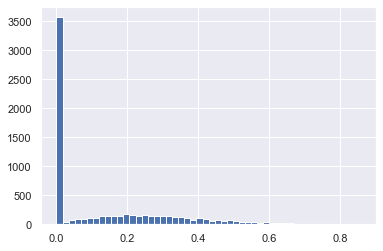

In [163]:
plt.hist(credit_data_default_LGD['recovery_rate'], bins=50)

'recovery_rate' is the dependent variable of LGD.

### Dependent Variables: EAD

We will compute the credit conversion factor, which is the amount not paid devided by the total loan amount.

### Similarly to LGD model, we create the total recovery principal for each input. The number will be randonly selected between 0 and to total loan amount. Please note that this is a different case from the LGD model. And those two cases are for demonstrative purpose. At last, we will pretend them to be one case to cal.

The random numbers abide (1-x), where x is a beta distribution (alpha = 2, beta=5), to the proportion of the total loan amount.

In [164]:
credit_data_default_LGD_EAD = credit_data_default_LGD.copy()

In [165]:
credit_data_default_LGD_EAD['total_rec_prcp'] = credit_data_default_LGD_EAD['loan_amnt'] - round(credit_data_default_LGD_EAD['loan_amnt'] * (1 - np.random.beta(2,5,credit_data_default_LGD_EAD.shape[0])))

In [166]:
credit_data_default_LGD_EAD.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,total_rec_prcp,recovery,recovery_rate,recovery_rate_0_1
21472,33.0,19200.0,RENT,0.0,PERSONAL,B,6000.0,10.65,1.0,0.31,N,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1215.0,540.0,0.090000,1
18804,27.0,27000.0,OWN,0.0,EDUCATION,G,11500.0,20.11,1.0,0.43,N,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,258.0,3024.0,0.262957,1
19105,27.0,15600.0,RENT,1.0,HOMEIMPROVEMENT,D,2250.0,18.25,1.0,0.14,N,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,631.0,563.0,0.250222,1
20561,28.0,88000.0,RENT,3.0,PERSONAL,B,10000.0,10.65,1.0,0.11,N,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1911.0,1170.0,0.117000,1
16782,25.0,49000.0,RENT,1.0,PERSONAL,D,12000.0,13.49,1.0,0.24,N,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2812.0,5567.0,0.463917,1
19863,28.0,41500.0,RENT,3.0,MEDICAL,D,11000.0,15.33,1.0,0.27,Y,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3747.0,3775.0,0.343182,1
23005,30.0,35600.0,RENT,0.0,EDUCATION,D,8000.0,14.59,1.0,0.22,N,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3994.0,2261.0,0.282625,1
548,26.0,42000.0,RENT,0.0,MEDICAL,F,21000.0,17.26,1.0,0.50,Y,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1729.0,5657.0,0.269381,1
30835,36.0,60000.0,MORTGAGE,3.0,DEBTCONSOLIDATION,D,13000.0,14.11,1.0,0.22,Y,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2184.0,2831.0,0.217769,1
15479,24.0,128000.0,MORTGAGE,7.0,DEBTCONSOLIDATION,D,18000.0,17.27,1.0,0.14,Y,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8320.0,4028.0,0.223778,1


In [167]:
credit_data_default_LGD_EAD['CCF'] = (credit_data_default_LGD_EAD['loan_amnt'] - credit_data_default_LGD_EAD['total_rec_prcp']) / credit_data_default_LGD_EAD['loan_amnt']

In [168]:
credit_data_default_LGD_EAD['CCF'].describe()

count    7108.000000
mean        0.713858
std         0.159602
min         0.114533
25%         0.610826
50%         0.733931
75%         0.840149
max         0.994733
Name: CCF, dtype: float64

(array([  1.,   2.,   1.,   2.,   4.,   4.,   8.,  11.,  10.,  20.,  20.,
         26.,  35.,  36.,  48.,  54.,  65.,  66.,  85.,  88.,  82., 119.,
        131., 150., 152., 152., 176., 185., 203., 258., 225., 266., 250.,
        287., 278., 277., 303., 294., 316., 286., 300., 283., 283., 295.,
        258., 236., 193., 132., 103.,  49.]),
 array([0.11453333, 0.13213733, 0.14974133, 0.16734533, 0.18494933,
        0.20255333, 0.22015733, 0.23776133, 0.25536533, 0.27296933,
        0.29057333, 0.30817733, 0.32578133, 0.34338533, 0.36098933,
        0.37859333, 0.39619733, 0.41380133, 0.43140533, 0.44900933,
        0.46661333, 0.48421733, 0.50182133, 0.51942533, 0.53702933,
        0.55463333, 0.57223733, 0.58984133, 0.60744533, 0.62504933,
        0.64265333, 0.66025733, 0.67786133, 0.69546533, 0.71306933,
        0.73067333, 0.74827733, 0.76588133, 0.78348533, 0.80108933,
        0.81869333, 0.83629733, 0.85390133, 0.87150533, 0.88910933,
        0.90671333, 0.92431733, 0.94192133, 0.

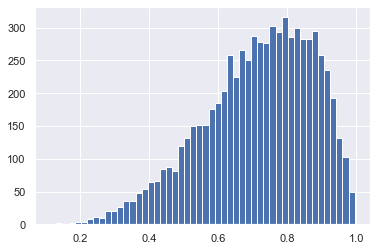

In [169]:
plt.hist(credit_data_default_LGD_EAD['CCF'], bins=50)

# LGD Model

In [159]:
from sklearn.model_selection import train_test_split

In [170]:
X_LGD_train, X_LGD_test, y_LGD_train, y_LGD_test = train_test_split(credit_data_default_LGD_EAD.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1), credit_data_default_LGD_EAD['recovery_rate_0_1'], test_size=0.2, random_state=42)